 # Análisis de datos

### Durante el semestre realizamos un proyecto el cual consistió en simular una estación meteorológica con un dispositivo Raspberry Pi. Donde su objetivo era tomar datos de presión, temperatura y humedad cada cierto lapso el cual definimos a media hora. 

### El código que ocupo el Raspberry fue el siguiente:

```python
while 1:
    namefile=datetime.now().strftime("%Y-%m-%d")+".csv"
    if not os.path.exists("/home/computo/Desktop/Datos_SenseHat/"+namefile):
        f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")
        f.write("Datetime,Humedad, Temperatura,Presion\r\n")
        f.close()
    else:
        d=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")
        d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        humidity=sense.get_humidity()
        temp=sense.get_temperature()
        pressure=sense.get_pressure()
        d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))
        d.close()
        print("OK")
        message="T: "+str(temp)+" p: "+str(pressure)+"H: "+str(humidity)
        sense.show_message(message,scroll_speed=0.10)
        timpe.sleep(1800)
```
### A continuación veamos el código de manera desglosada para entender que hace cada una de sus partes:

### En todo este primer ciclo lo primero que hace el código es generar un archivo CSV con el nombre de la fecha de hoy. Una vez encontrado (o creado) el código lo abre y escribe los nombres de las columnas, siendo estas: datetime, Humedad, temperatura y presión.
```python
while 1:
    namefile=datetime.now().strftime("%Y-%m-%d")+".csv"
    if not os.path.exists("/home/computo/Desktop/Datos_SenseHat/"+namefile):
        f=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"w")
        f.write("Datetime,Humedad, Temperatura,Presion\r\n")
        f.close()
```

### En este segundo ciclo, lo que ocurre es que una vez encontrado el archivo con la fecha actual lo abre e introduce el dato de la fecha actual aunado a la hora. Seguido de esto introduce a su vez los datos de humedad, temperatura y presión donde una vez los toma arroja un mensaje ("Ok") por medio de la pantalla LED además de los valores numéricos de las variables tomadas. Como último se define la rapidez del mensaje y el lapso entre cada mensaje.
```python
else:
        d=open("/home/computo/Desktop/Datos_SenseHat/"+namefile,"a")
        d.write(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
        humidity=sense.get_humidity()
        temp=sense.get_temperature()
        pressure=sense.get_pressure()
        d.write(",{:.2f},{:.2f},{:.2f}\r\n".format(humidity,temp,pressure))
        d.close()
        print("OK")
        message="T: "+str(temp)+" p: "+str(pressure)+"H: "+str(humidity)
        sense.show_message(message,scroll_speed=0.10)
        timpe.sleep(1800)
```

In [23]:
import numpy as np
import pandas as pd
import glob
import cufflinks as cf
from IPython.display import display, HTML

cf.set_config_file(sharing='public', theme='space', offline='True')

In [24]:
dt=glob.glob('2023*.csv')

In [25]:
dat=[]
for files in dt:
    dat.append(pd.read_csv(files))
dat2=pd.concat(dat,ignore_index=True)

In [26]:
Time=pd.to_datetime(dat2['Datetime'][:], format="%Y-%m-%d %H:%M:%S")

In [27]:
datos=dat2.drop(['Datetime'], axis=1)

In [28]:
datos.insert(0,"Time",Time,True)

In [29]:
dates=datos.sort_values(by=['Time'], ignore_index=True)

### Aquí tuvimos un pequeño problema donde por fallos del sensor, se marcaron datos de presión con un valor de 0, por lo que en esta línea de código hicimos que los 0 fueran remplazados por NAN, sin embargo, esto nos dejaba unos espacios vacíos en la gráfica, por lo que en la siguiente línea de código se realizó una interpolación de los datos usando el promedio para unir esos espacios en blanco.

In [30]:
dates["Presion"].replace(0, np.nan, inplace=True)

In [31]:
for i in dates.Presion:
    Val = dates['Presion'].mean()
    dates['Presion'].fillna(value=Val, inplace=True)

In [32]:
TT=dates.set_index('Time')

In [33]:
TT["Presion"].replace(0, np.nan, inplace=True)

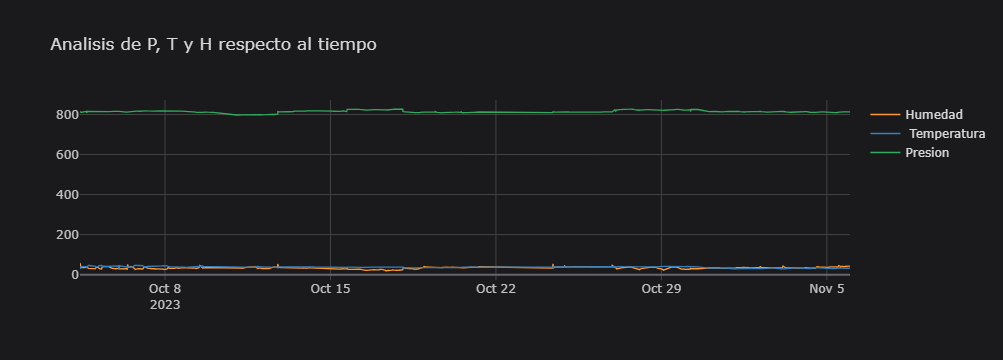

In [34]:
TT.iplot(kind='line', title='Analisis de P, T y H respecto al tiempo')

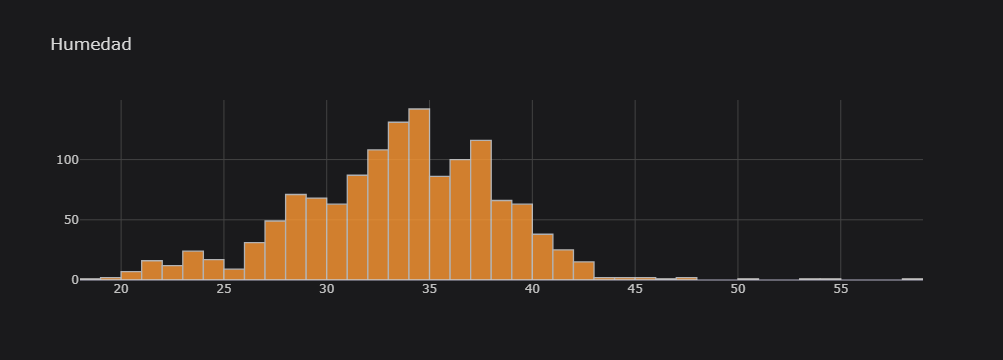

In [35]:
TT.iplot(kind='histogram', column='Humedad', title='Humedad')

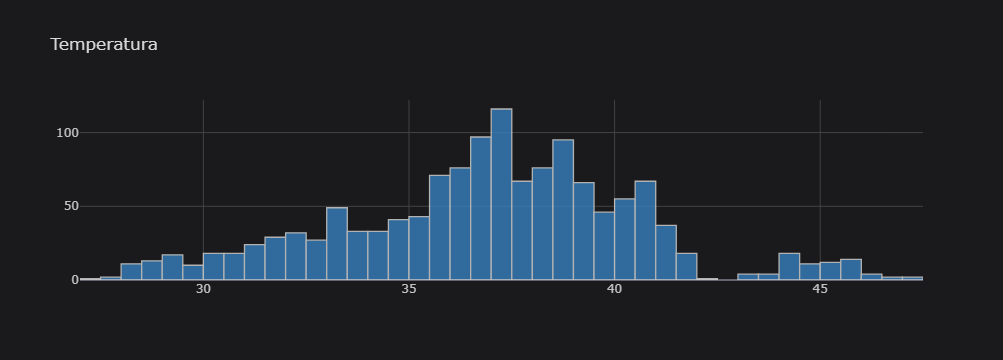

In [36]:
TT.iplot(kind='hist', column=' Temperatura', title='Temperatura')

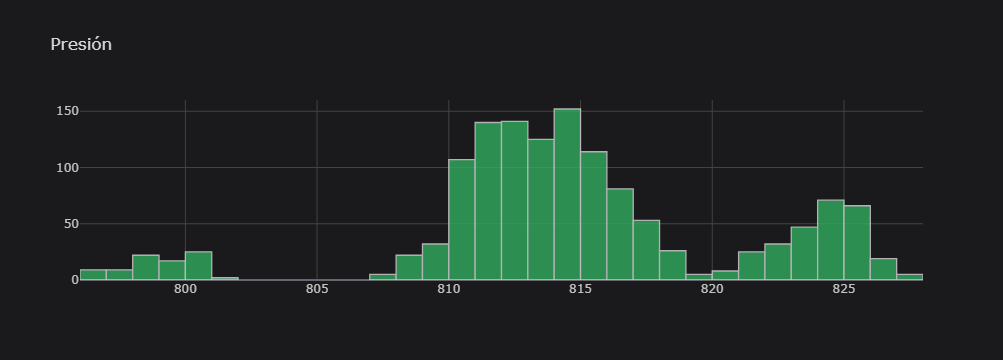

In [37]:
TT.iplot(kind='hist', column='Presion', title='Presión')

### Estos histogramas no se encuentran comparando el tiempo respecto a los valores obtenidos, sino nos muestran la abundancia de los valores obtenidos (eje x) respecto a la cantidad de datos (eje y) arrojándonos de manera visual donde se concentra nuestra abundancia.